In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data #

In [3]:
df = pd.read_csv('massshootings.csv') # cleaned data, originally from Mother Jones Mass Shootings database, from 1982 - 2019

In [4]:
# Check to see if it's a dataframe
type(df) 

pandas.core.frame.DataFrame

In [5]:
# Information on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              151 non-null    object
 1   location                          151 non-null    object
 2   date                              151 non-null    object
 3   summary                           151 non-null    object
 4   fatalities                        151 non-null    int64 
 5   injured                           151 non-null    int64 
 6   total_victims                     151 non-null    int64 
 7   location.1                        151 non-null    object
 8   age_of_shooter                    151 non-null    int64 
 9   prior_signs_mental_health_issues  151 non-null    object
 10  mental_health_details             151 non-null    object
 11  weapons_obtained_legally          151 non-null    object
 12  where_obtained        

In [6]:
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,LA dance studio mass shooting,"Monterey Park, California",1/21/2023,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,Yes,...,-,Asian,M,https://www.latimes.com/california/story/2023-...,https://www.latimes.com/california/story/2023-...,-,-,-,Mass,2023
1,Yountville veterans home shooting,"Yountville, California",3/9/2018,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,36,Yes,...,-,Asian,M,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,https://www.cnn.com/2018/03/10/us/california-v...,38.392496,-122.366528,Mass,2018
2,San Francisco UPS shooting,"San Francisco, California",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Workplace,38,Yes,...,MAC-10-style “assault pistol”; 30-round magazi...,Asian,M,http://www.nbcbayarea.com/news/local/Active-Sh...,http://www.ktvu.com/news/ktvu-local-news/26177...,http://www.nbcbayarea.com/news/local/Active-Sh...,37.765947,-122.406087,Mass,2017
3,Maine bowling alley and bar shootings,"Lewiston, Maine",10/25/2023,"Robert Card, 40, an Army reservist and firearm...",18,13,31,Other,40,Yes,...,AR-15-style rifle (Rugar SFAR),White,M,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,-,-,-,Spree,2023
4,Oikos University killings,"Oakland, California",4/2/2012,"One L. Goh, 43, a former student, opened fire ...",7,3,10,School,43,Yes,...,.45-caliber semiautomatic handgun,Asian,M,http://blog.sfgate.com/eguillermo/2012/04/05/s...,http://berkeley.patch.com/articles/one-l-goh-s...,http://blog.sfgate.com/eguillermo/2012/04/05/s...,37.8043808,-122.2708166,Mass,2012


In [7]:
df.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources', 'mental_health_sources',
       'sources_additional_age', 'latitude', 'longitude', 'type', 'year'],
      dtype='object')

In [8]:
df.dtypes

case                                object
location                            object
date                                object
summary                             object
fatalities                           int64
injured                              int64
total_victims                        int64
location.1                          object
age_of_shooter                       int64
prior_signs_mental_health_issues    object
mental_health_details               object
weapons_obtained_legally            object
where_obtained                      object
weapon_type                         object
weapon_details                      object
race                                object
gender                              object
sources                             object
mental_health_sources               object
sources_additional_age              object
latitude                            object
longitude                           object
type                                object
year       

# Preliminary Questions #most common age/race/gender of shooters?

most common firearms used?

most common places where shootings occur? most common states?

where did most people get the weapons? were they legally acquired?

any years that peaked?

what part does mental health play in causing shootings?

Let's do multiple data quality checks and pursue with our analysis.
lyses.

# Missing Values #

In [11]:
df.isnull().sum() 

case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
total_victims                       0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      1
race                                0
gender                              0
sources                             0
mental_health_sources               0
sources_additional_age              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64

Only one weapons details seem to be missing.

In [13]:
df.describe()

,fatalities,injured,total_victims,age_of_shooter,year
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,7.675497,10.907285,18.582781,34.311258,2011.231788
std,7.412197,45.023453,50.211069,13.457680,10.910205
min,3.000000,0.000000,3.000000,11.000000,1982.000000
25%,4.000000,1.000000,6.000000,22.500000,2006.000000
50%,6.000000,3.000000,10.000000,33.000000,2015.000000
75%,8.000000,10.000000,16.500000,43.500000,2019.000000
max,60.000000,546.000000,606.000000,72.000000,2024.000000


# When have shootings most occur? #

<Axes: xlabel='year', ylabel='total_victims'>

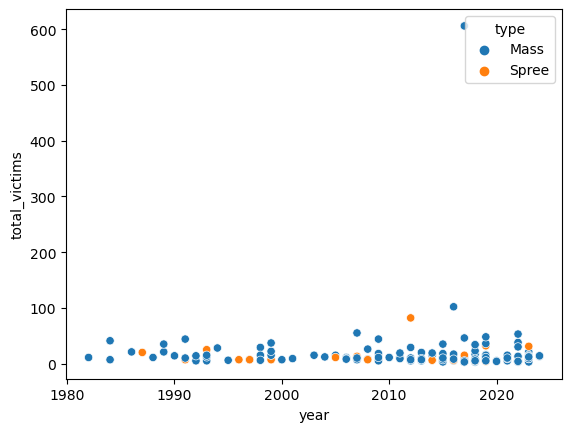

In [15]:
sns.scatterplot(data=df, x="year", y="total_victims", hue="type")

In [16]:
# Counts by Shooting type
df.groupby('type').sum()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,year
type,,,,,,,,,,,,,,,,,,,,,
Mass,LA dance studio mass shootingYountville vetera...,"Monterey Park, CaliforniaYountville, Californi...",1/21/20233/9/20186/14/20174/2/20122/21/20124/3...,"Huu Can Tran, 72, fled the scene in a white va...",1015,1467,2482,OtherWorkplaceWorkplaceSchoolOtherOtherSchoolO...,4371,YesYesYesYesYesYesYesYesYesYesYesYesYesNoYesYe...,...,semiautomatic assault weapon (Details pending)...,--MAC-10-style “assault pistol”; 30-round maga...,AsianAsianAsianAsianAsianAsianAsianBlackBlackB...,MMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...,https://www.latimes.com/california/story/2023-...,https://www.latimes.com/california/story/2023-...,-https://www.cnn.com/2018/03/10/us/california-...,-38.39249637.76594737.804380833.941212742.0998...,--122.366528-122.406087-122.2708166-84.2135309...,259491
Spree,Maine bowling alley and bar shootingsHalf Moon...,"Lewiston, MaineHalf Moon Bay, CaliforniaHeding...",10/25/20231/23/202310/13/20223/16/202112/10/20...,"Robert Card, 40, an Army reservist and firearm...",144,180,324,OtherWorkplaceOtherWorkplaceOtherOtherOtherWor...,810,YesYesYesYesYesYesYesYesNoYesYesYesNoYesYesYes...,...,semiautomatic riflesemiautomatic handgunshotgu...,AR-15-style rifle (Rugar SFAR)--AR-15-style ri...,WhiteAsianWhiteWhiteBlackWhiteWhiteLatinoWhite...,MMMMM & FMMMMMFMMMMMMMMMMM,https://www.washingtonpost.com/nation/2023/10/...,https://www.nytimes.com/article/lewiston-maine...,--------https://www.nbcnews.com/news/us-news/c...,---34.11165340.70736331.92597440.78514235.3493...,----84.580376-74.083609-102.2796-77.839411-118...,44205


In [17]:
# Looking at shootings by Race, Shooting type, and  impact to victims injured or fatal
df.groupby(['race', 'type']).sum()

case  \
race            type                                                       
Asian           Mass   LA dance studio mass shootingYountville vetera...   
                Spree  Half Moon Bay spree shootingXerox killingsUniv...   
Black           Mass   Philidelphia neighborhood shootingMichigan Sta...   
                Spree  Jersey City kosher market shootingBaton Rouge ...   
Latino          Mass   Texas outlet mall shootingConcrete company sho...   
                Spree  T&T Trucking shootingHotel shootingCaltrans ma...   
Native American Mass   Marysville-Pilchuck High School shootingRed La...   
                Spree                            Alturas tribal shooting   
White           Mass   Apalachee High School shootingArkansas grocery...   
                Spree  Maine bowling alley and bar shootingsRaleigh s...   

                                                                location  \
race            type                                                       
Asian           Mass   Monterey Park, CaliforniaYountville, Californi...   
                Spree  Half Moon Bay, CaliforniaHonolulu, HawaiiIowa ...   
Black           Mass   Philadelphia, PennsylvaniaEast Lansing, Michig...   
                Spree  Jersey City, New JerseyBaton Rouge, LousianaFo...   
Latino          Mass   Allen, TexasSmithsburg, MarylandUvalde, TexasO...   
                Spree  Bakersfield, CaliforniaTampa, FloridaOrange, C...   
Native American Mass           Marysville, WashingtonRed Lake, Minnesota   
                Spree                                Alturas, California   
White           Mass   Winder, GeorgiaFordyce, ArkansasLas Vegas, Nev...   
                Spree  Lewiston, MaineHedingham, North CarolinaAtlant...   

                                                                    date  \
race            type                                                       
Asian           Mass   1/21/20233/9/20186/14/20174/2/20122/21/20124/3...   
                Spree                        1/23/202311/2/199911/1/1991   
Black           Mass   7/3/20232/13/202311/22/202211/13/20226/1/20222...   
                Spree               12/10/20197/17/20162/9/199612/7/1993   
Latino          Mass   5/6/20236/9/20225/24/20223/31/20213/16/20207/2...   
                Spree                      9/12/201812/30/199912/18/1997   
Native American Mass                                 10/24/20143/21/2005   
                Spree                                          2/20/2014   
White           Mass   9/4/20246/21/202412/6/20238/26/20238/23/20235/...   
                Spree  10/25/202310/13/20223/16/20218/31/20191/24/201...   

                                                                 summary  \
race            type                                                       
Asian           Mass   Huu Can Tran, 72, fled the scene in a white va...   
                Spree  Chunli Zhao, 67, suspected of carrying out the...   
Black           Mass   Kimbrady Carriker, 40, wearing a ski mask and ...   
                Spree  David N. Anderson, 47, and Francine Graham, 50...   
Latino          Mass   Mauricio Garcia, 33, wore tactical gear and us...   
                Spree  Javier Casarez, 54, who was going through a bi...   
Native American Mass   Jaylen Fryberg, 15, using a .40-caliber Berret...   
                Spree  Cherie Lash Rhoades, 44, opened fire at the Ce...   
White           Mass   Colt Gray, 14, was apprehended by responding p...   
                Spree  Robert Card, 40, an Army reservist and firearm...   

                       fatalities  injured  total_victims  \
race            type                                        
Asian           Mass           75       42            117   
                Spree          20        2             22   
Black           Mass          119       81            200   
                Spree          19       26             45   
Latino          Mass           77       66        

# How were weapons procured? #

<Axes: xlabel='weapons_obtained_legally', ylabel='count'>

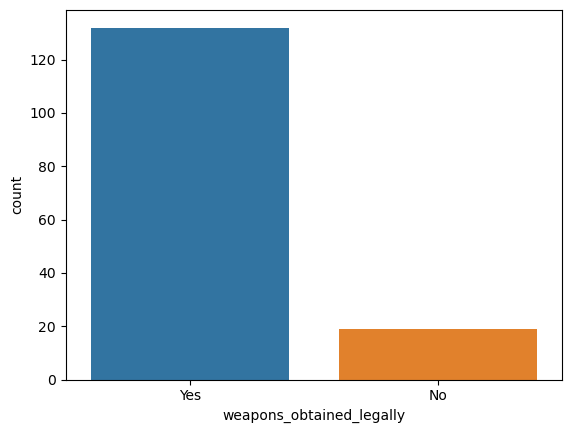

In [19]:
sns.countplot(data = df, x = "weapons_obtained_legally")

# What places do shootings occur? #

<Axes: xlabel='location.1', ylabel='count'>

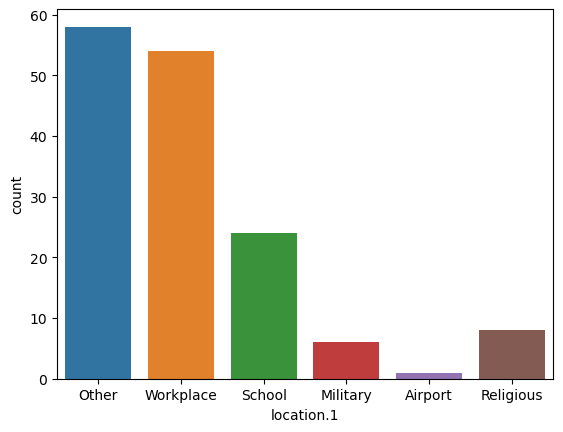

In [21]:
sns.countplot(data = df, x = "location.1")

Workplaces have the highest number of shootings aside from "Other." An interesting investigation could be to dive into the job market and economy trends to see the correlations.

# Typical Shooter Profile? #

<Axes: xlabel='gender', ylabel='count'>

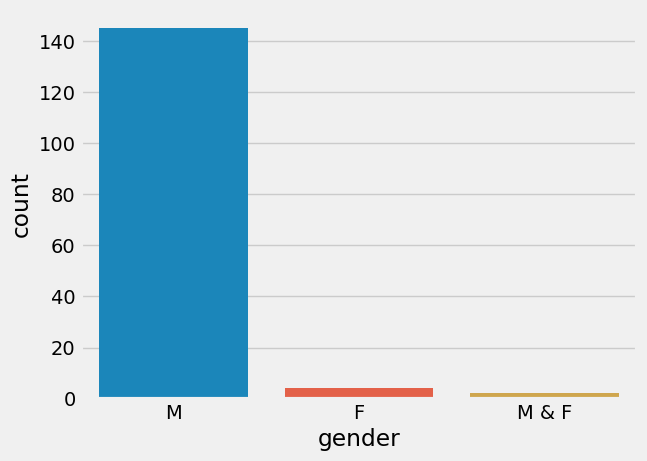

In [24]:
plt.style.use('fivethirtyeight')
sns.countplot(x = "gender", data = df)

<Axes: xlabel='year', ylabel='gender'>

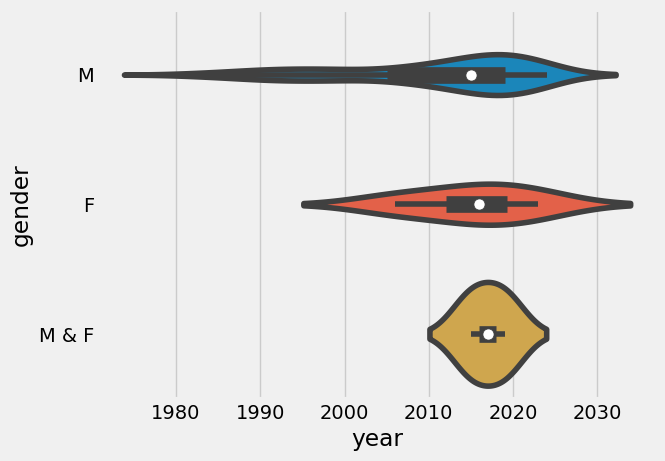

In [25]:
plt.style.use('fivethirtyeight')
sns.violinplot(x = "year", y = "gender", data = df)

Female shooters have been popping up more recently, but overall shooters are overwhelmingly male. 

<Axes: xlabel='race', ylabel='count'>

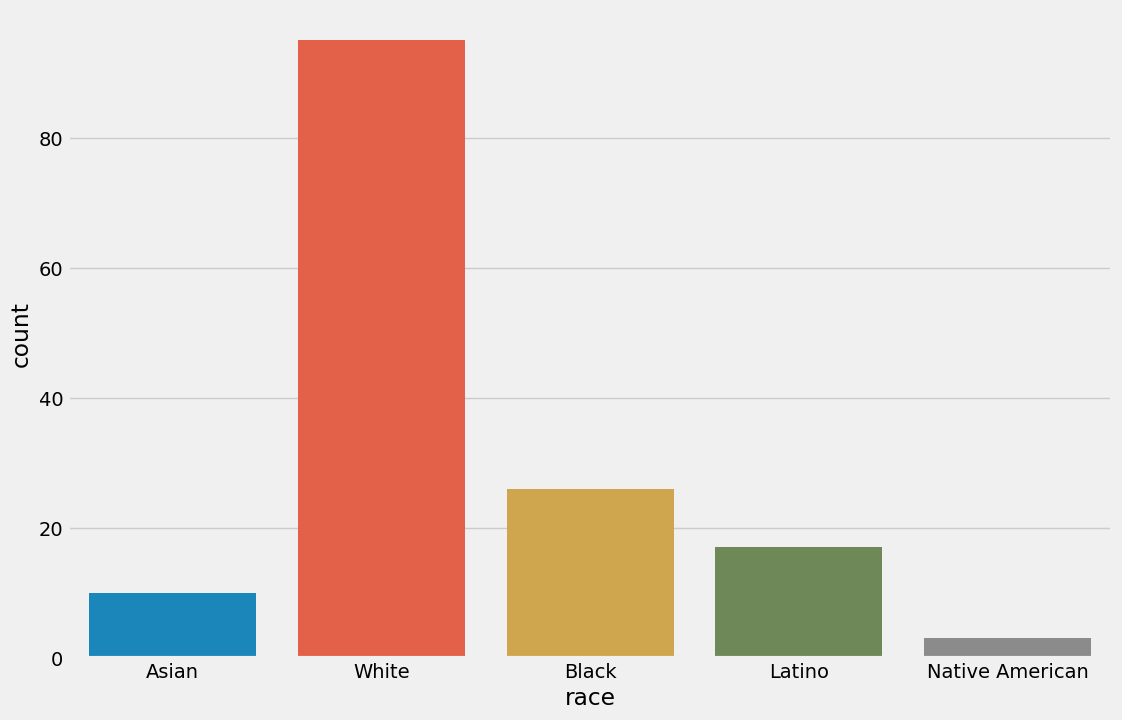

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))
sns.countplot(x = "race", data = df)

Mostly white shooters. It's important to note that the data shows Middle Eastern names as white for demographic purposes. Possibly a seperate column should be formed for these shooters.

# Mental Illness #

<Axes: xlabel='prior_signs_mental_health_issues', ylabel='count'>

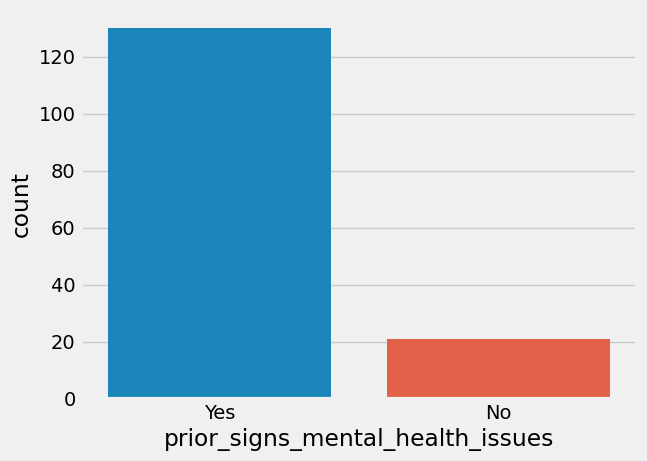

In [30]:
sns.countplot(data = df, x = "prior_signs_mental_health_issues")

Mental illness seems to be prevalent before a shooter commits their act. A deep dive into what mental illness are most common for shooters and how severe would be worth investigating.

# Victim casualties #

C:\Users\Juan Alberto Yostly\AppData\Local\Temp\ipykernel_14092\2369393524.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


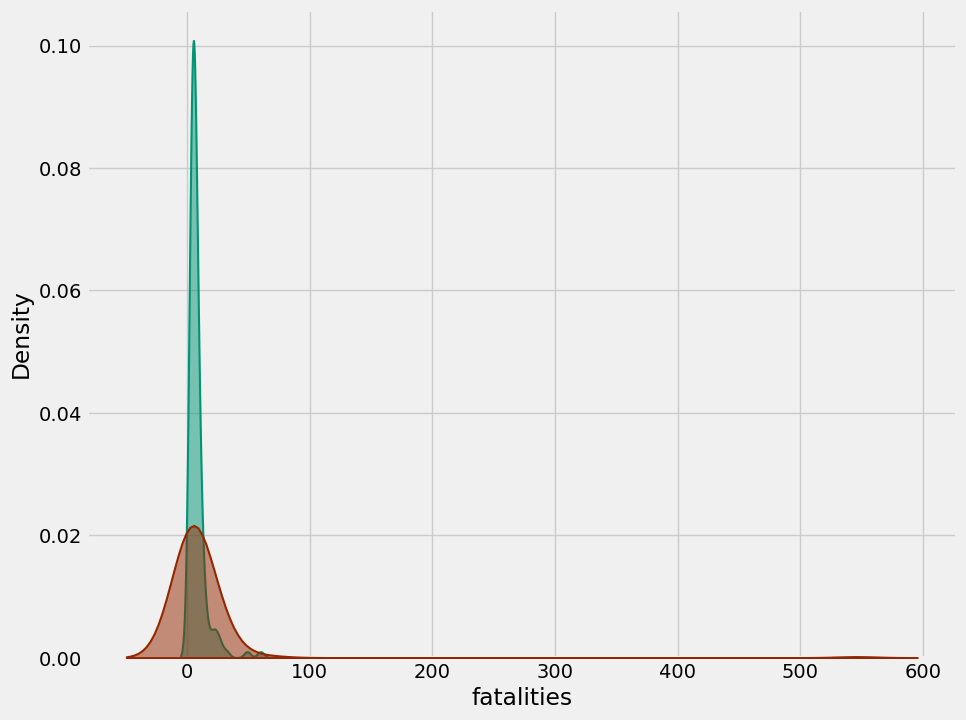

In [57]:
plt.figure(figsize = (10, 8))
with pd.option_context('mode.use_inf_as_na', True):
    sns.kdeplot(data = df['fatalities'], color = '#009473', fill = True, linewidth = 1.5, alpha = 0.5, zorder = 3)
    sns.kdeplot(data = df['injured'], color = '#952700', fill = True, linewidth = 1.5, alpha = 0.5, zorder = 3)

A little bit less than half of casualties result in deaths from a shooter's act. It would be worth investigating whether the fatality was due to blunt force, blood loss, or how long it took before they became a casuality.